In [ ]:
pip install yfinance
pip install pydot
pip install tensorflow

In [6]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

2025-10-16 19:15:03.706854: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [84]:
# 1. Coleta de dados a partir de 2018
symbol = "MRK"


data = yf.download(symbol, start="2018-01-01", end="2025-06-01")
data = data[['Open', 'Close']]  # Incluindo 'Open' agora

# 2. Cálculo dos Indicadores Técnicos
data['EMA9'] = data['Open'].ewm(span=9, adjust=False).mean()
data['SMA20'] = data['Open'].rolling(window=20).mean()
data['SMA200'] = data['Open'].rolling(window=200).mean()

# Remover linhas com valores NaN (por causa dos indicadores)
data = data.iloc[200:]
print(data)
data = data.dropna()

# 3. Preparação dos dados
window_size = 60
X, y, window_dates = [], [], []

features = ['Open', 'EMA9', 'SMA20', 'SMA200']
data_values = data[features].values
close_prices = data['Close'].values

for i in range(len(data_values) - window_size - 1):
    window = data_values[i:i + window_size]
    X.append(window)
    
    open_price = data_values[i + window_size][0]  # last open in window
    close_price = close_prices[i + window_size]       # next day's close
    label = 1 if close_price > open_price else 0      # binary label
    y.append(label)

X = np.array(X)
y = np.array(y)
print(X[:5])
print(y[:5])
print(len(X))
print(len(y))
# Verificando formato
print("Formato de X:", X.shape)  # (amostras, 60, 4)
print("Formato de y:", y.shape)

/var/folders/11/l_xl0mcx11vb3dr5w91sdcbh0000gn/T/ipykernel_74943/1842523286.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, start="2018-01-01", end="2025-06-01")
[*********************100%***********************]  1 of 1 completed

Price            Open      Close       EMA9      SMA20     SMA200
Ticker            MRK        MRK                                 
Date                                                             
2018-10-17  54.691761  55.253372  54.205118  54.490206  46.776724
2018-10-18  55.507254  55.553413  54.465545  54.559446  46.842924
2018-10-19  55.622667  55.661137  54.696970  54.612914  46.908912
2018-10-22  56.138128  55.830399  54.985201  54.691771  46.973907
2018-10-23  55.514957  55.468792  55.091152  54.742162  47.036462
...               ...        ...        ...        ...        ...
2025-05-23  76.030213  76.059624  75.704276  77.803268  95.182368
2025-05-27  76.490993  76.069420  75.861619  77.559147  95.029944
2025-05-28  75.912563  74.677254  75.871808  77.247869  94.868689
2025-05-29  74.206663  74.902748  75.538779  76.778257  94.694786
2025-05-30  75.432168  75.334122  75.517457  76.407175  94.522556

[1663 rows x 5 columns]
[[[54.69176129 54.20511808 54.49020637 46.77672411]

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(data.index, data['Open'], label='Preço de Fechamento')
plt.plot(data.index, data['EMA9'], label='EMA9')
plt.plot(data.index, data['SMA20'], label='SMA20')
plt.plot(data.index, data['SMA200'], label='SMA200')
plt.title("Indicadores Técnicos da Merck (MRK)")
plt.xlabel("Data")
plt.ylabel("Preço (USD)")
plt.legend()
plt.grid(True)
plt.show()

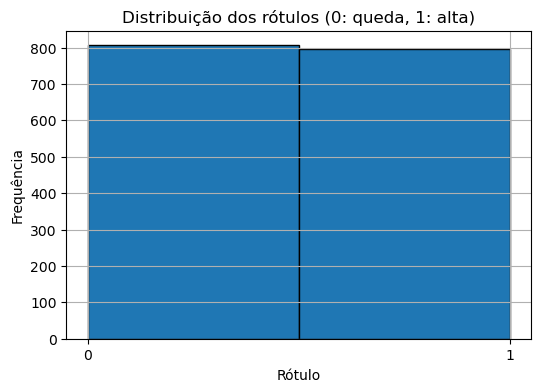

In [88]:
# Normalização dos dados
n_samples, n_timesteps, n_features = X.shape
X_reshaped = X.reshape(-1, n_features)  # Achata para aplicar a normalização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reshaped)
X = X_scaled.reshape(n_samples, n_timesteps, n_features)

# Visualizando a distribuição dos rótulos
plt.figure(figsize=(6,4))
plt.hist(y, bins=2, edgecolor='k', align='mid')
plt.xticks([0, 1])
plt.title("Distribuição dos rótulos (0: queda, 1: alta)")
plt.xlabel("Rótulo")
plt.ylabel("Frequência")
plt.grid(True)
plt.show()


In [92]:
# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=723235431)
print(len(X_train[0]))
print(y_train[0])

60
0


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_10 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_10 (Conv1D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5010 - loss: 0.7150 - val_accuracy: 0.5175 - val_loss: 0.7147
Epoch 2/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4922 - loss: 0.7068 - val_accuracy: 0.5175 - val_loss: 0.7077
Epoch 3/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5244 - loss: 0.6920 - val_accuracy: 0.5097 - val_loss: 0.6926
Epoch 4/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4805 - loss: 0.6944 - val_accuracy: 0.4786 - val_loss: 0.6931
Epoch 5/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5010 - loss: 0.6934 - val_accuracy: 0.4825 - val_loss: 0.6932
Epoch 6/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4990 - loss: 0.6933 - val_accuracy: 0.4825 - val_loss: 0.6932
Epoch 7/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5010 - loss: 0.6932 - val_accuracy: 0.4825 - val_loss: 0.6932
Epoch 8/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4990 - loss: 0.6932 - val_accuracy: 0.

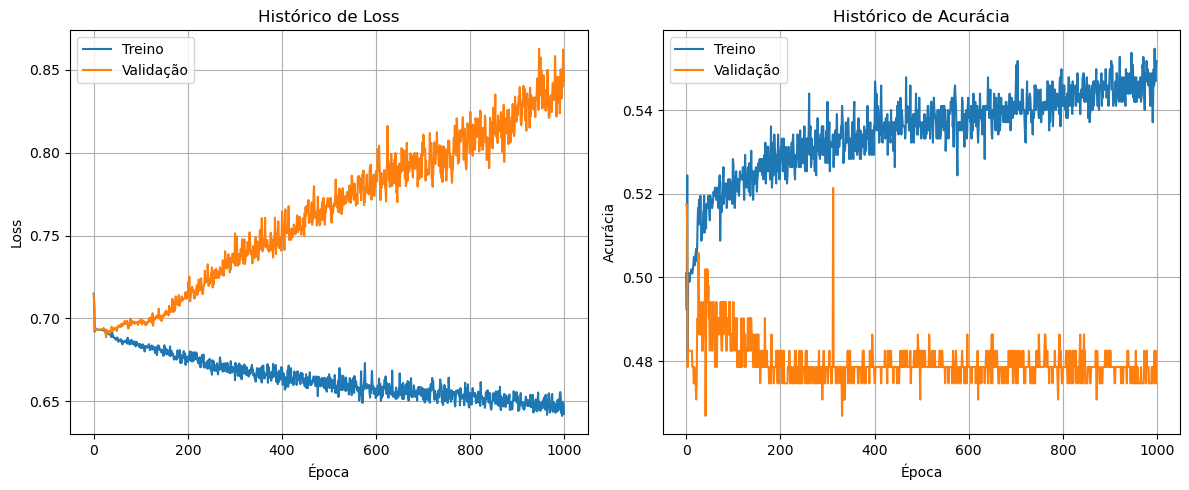

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5265 - loss: 0.8188 
Acurácia no conjunto de teste: 0.5264797210693359


In [99]:

# 4. Construção do modelo CNN 1D para múltiplas features
model = Sequential()

model.add(Dropout(0.2))
model.add(Conv1D(filters=16, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Saída para classificação binária

# Compilando o modelo
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# 5. Treinamento do modelo
history = model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_split=0.2)

# Plot do histórico de treinamento
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Treino')
plt.plot(history.history['val_loss'], label='Validação')
plt.title("Histórico de Loss")
plt.xlabel("Época")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Treino')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title("Histórico de Acurácia")
plt.xlabel("Época")
plt.ylabel("Acurácia")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# 6. Avaliação do modelo no conjunto de teste
loss, acc = model.evaluate(X_test, y_test)
print("Acurácia no conjunto de teste:", acc)

In [37]:
# Após o treinamento, para obter as probabilidades no conjunto de teste:
predicted_probabilities = model.predict(X_test)

# Exibir as probabilidades para os 5 primeiros exemplos:
for i, prob in enumerate(predicted_probabilities[:5]):
    print(f"Amostra {i}: Probabilidade de alta = {prob[0]:.2f}")
    
# Caso você queira converter para um sinal (subir/descender) utilizando um threshold de 0.5:
predicted_signals = (predicted_probabilities.flatten() > 0.5).astype(int)
print("Sinais previstos (0: baixa, 1: alta) para os 5 primeiros exemplos:", predicted_signals[:5])


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Amostra 0: Probabilidade de alta = 0.16
Amostra 1: Probabilidade de alta = 0.41
Amostra 2: Probabilidade de alta = 0.53
Amostra 3: Probabilidade de alta = 0.80
Amostra 4: Probabilidade de alta = 1.00
Sinais previstos (0: baixa, 1: alta) para os 5 primeiros exemplos: [0 0 1 1 1]


In [104]:
model.save("modelo_completo.keras")


In [106]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_10 (Dropout)            │ (32, 60, 4)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_10 (Conv1D)              │ (32, 58, 16)           │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (32, 928)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (32, 16)               │        14,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (32, 1)                │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,269 (176.84 KB)

 Trainable params: 15,089 (58.94 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 30,180 (117.89 KB)

In [108]:
# from tensorflow.keras.utils import plot_model

# plot_model(model, to_file='modelo.png', show_shapes=True, show_layer_names=True)


In [ ]:
# Plot dos indicadores técnicos e fundamentalistas em subplots
fig, axs = plt.subplots(3, 3, figsize=(18, 12))

# Preço de Fechamento
axs[0, 0].plot(data.index, data['Close'])
axs[0, 0].set_title("Preço de Fechamento")

# EMA9
axs[0, 1].plot(data.index, data['EMA9'])
axs[0, 1].set_title("EMA9")

# SMA20
axs[0, 2].plot(data.index, data['SMA20'])
axs[0, 2].set_title("SMA20")

# SMA200
axs[1, 0].plot(data.index, data['SMA200'])
axs[1, 0].set_title("SMA200")

# MACD
axs[1, 1].plot(data.index, data['MACD'])
axs[1, 1].set_title("MACD")

# RSI
axs[1, 2].plot(data.index, data['RSI'])
axs[1, 2].set_title("RSI")

# OBV
axs[2, 0].plot(data.index, data['OBV'])
axs[2, 0].set_title("OBV")


plt.tight_layout()
plt.show()
